In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the data
data = pd.read_csv("../dataset/weather_data_formatted_weekly_rename_station_column_with_trend_words.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head()

,Year,Week,cases,Ang Mo Kio_Weekly Rainfall (mm),Ang Mo Kio_Weekly Mean Temperature (°C),Ang Mo Kio_Weekly Maximum Temperature (°C),Ang Mo Kio_Weekly Minimum Temperature (°C),Ang Mo Kio_Weekly Mean Wind Speed (km/h),Ang Mo Kio_Weekly Maximum Wind Speed (km/h),Changi_Weekly Rainfall (mm),Changi_Weekly Mean Temperature (°C),Changi_Weekly Maximum Temperature (°C),Changi_Weekly Minimum Temperature (°C),Changi_Weekly Mean Wind Speed (km/h),Changi_Weekly Maximum Wind Speed (km/h),Clementi_Weekly Rainfall (mm),Clementi_Weekly Mean Wind Speed (km/h),Clementi_Weekly Maximum Wind Speed (km/h),East Coast Parkway_Weekly Rainfall (mm),Jurong Island_Weekly Rainfall (mm),Khatib_Weekly Rainfall (mm),Marina Barrage_Weekly Rainfall (mm),Pasir Panjang_Weekly Rainfall (mm),Pasir Panjang_Weekly Mean Temperature (°C),Pasir Panjang_Weekly Maximum Temperature (°C),Pasir Panjang_Weekly Minimum Temperature (°C),Pasir Panjang_Weekly Mean Wind Speed (km/h),Pasir Panjang_Weekly Maximum Wind Speed (km/h),Tai Seng_Weekly Rainfall (mm),Tai Seng_Weekly Mean Temperature (°C),Tai Seng_Weekly Maximum Temperature (°C),Tai Seng_Weekly Minimum Temperature (°C),Tai Seng_Weekly Mean Wind Speed (km/h),Tai Seng_Weekly Maximum Wind Speed (km/h),Tuas South_Weekly Rainfall (mm),Tuas South_Weekly Maximum Temperature (°C),Tuas South_Weekly Minimum Temperature (°C),Tuas South_Weekly Mean Wind Speed (km/h),Tuas South_Weekly Maximum Wind Speed (km/h),Botanic Garden_Weekly Rainfall (mm),Buangkok_Weekly Rainfall (mm),Bukit Panjang_Weekly Rainfall (mm),Buona Vista_Weekly Rainfall (mm),Choa Chu Kang (Central)_Weekly Rainfall (mm),Choa Chu Kang (West)_Weekly Rainfall (mm),Jurong Pier_Weekly Rainfall (mm),Kent Ridge_Weekly Rainfall (mm),Macritchie Reservoir_Weekly Rainfall (mm),Mandai_Weekly Rainfall (mm),Nicoll Highway_Weekly Rainfall (mm),Paya Lebar_Weekly Rainfall (mm),Paya Lebar_Weekly Maximum Temperature (°C),Paya Lebar_Weekly Minimum Temperature (°C),Paya Lebar_Weekly Mean Wind Speed (km/h),Paya Lebar_Weekly Maximum Wind Speed (km/h),Punggol_Weekly Rainfall (mm),Queenstown_Weekly Rainfall (mm),Seletar_Weekly Rainfall (mm),Seletar_Weekly Mean Wind Speed (km/h),Seletar_Weekly Maximum Wind Speed (km/h),Sembawang_Weekly Rainfall (mm),Sembawang_Weekly Maximum Temperature (°C),Sembawang_Weekly Minimum Temperature (°C),Sembawang_Weekly Mean Wind Speed (km/h),Serangoon_Weekly Rainfall (mm),Somerset (Road)_Weekly Rainfall (mm),Tanjong Katong_Weekly Rainfall (mm),Tengah_Weekly Rainfall (mm),Tengah_Weekly Maximum Temperature (°C),Tengah_Weekly Minimum Temperature (°C),Tengah_Weekly Mean Wind Speed (km/h),Tengah_Weekly Maximum Wind Speed (km/h),Toa Payoh_Weekly Rainfall (mm),Ulu Pandan_Weekly Rainfall (mm),Upper Peirce Reservoir_Weekly Rainfall (mm),Upper Thomson_Weekly Rainfall (mm),Whampoa_Weekly Rainfall (mm),Dengue fever: (Singapore),Headache: (Singapore),Nausea: (Singapore),vomitting: (Singapore),muscle ache: (Singapore),rashes: (Singapore),Mosquito bite: (Singapore)
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [3]:
# Clean feature names to replace special characters with underscore
clean = lambda x: x.lower().replace(' ', '_').replace('.', '_').replace('(', '_').replace(')', '_').replace(':', '_')
data = data.rename(columns=clean)
data.head()

,year,week,cases,ang_mo_kio_weekly_rainfall__mm_,ang_mo_kio_weekly_mean_temperature__°c_,ang_mo_kio_weekly_maximum_temperature__°c_,ang_mo_kio_weekly_minimum_temperature__°c_,ang_mo_kio_weekly_mean_wind_speed__km/h_,ang_mo_kio_weekly_maximum_wind_speed__km/h_,changi_weekly_rainfall__mm_,changi_weekly_mean_temperature__°c_,changi_weekly_maximum_temperature__°c_,changi_weekly_minimum_temperature__°c_,changi_weekly_mean_wind_speed__km/h_,changi_weekly_maximum_wind_speed__km/h_,clementi_weekly_rainfall__mm_,clementi_weekly_mean_wind_speed__km/h_,clementi_weekly_maximum_wind_speed__km/h_,east_coast_parkway_weekly_rainfall__mm_,jurong_island_weekly_rainfall__mm_,khatib_weekly_rainfall__mm_,marina_barrage_weekly_rainfall__mm_,pasir_panjang_weekly_rainfall__mm_,pasir_panjang_weekly_mean_temperature__°c_,pasir_panjang_weekly_maximum_temperature__°c_,pasir_panjang_weekly_minimum_temperature__°c_,pasir_panjang_weekly_mean_wind_speed__km/h_,pasir_panjang_weekly_maximum_wind_speed__km/h_,tai_seng_weekly_rainfall__mm_,tai_seng_weekly_mean_temperature__°c_,tai_seng_weekly_maximum_temperature__°c_,tai_seng_weekly_minimum_temperature__°c_,tai_seng_weekly_mean_wind_speed__km/h_,tai_seng_weekly_maximum_wind_speed__km/h_,tuas_south_weekly_rainfall__mm_,tuas_south_weekly_maximum_temperature__°c_,tuas_south_weekly_minimum_temperature__°c_,tuas_south_weekly_mean_wind_speed__km/h_,tuas_south_weekly_maximum_wind_speed__km/h_,botanic_garden_weekly_rainfall__mm_,buangkok_weekly_rainfall__mm_,bukit_panjang_weekly_rainfall__mm_,buona_vista_weekly_rainfall__mm_,choa_chu_kang__central__weekly_rainfall__mm_,choa_chu_kang__west__weekly_rainfall__mm_,jurong_pier_weekly_rainfall__mm_,kent_ridge_weekly_rainfall__mm_,macritchie_reservoir_weekly_rainfall__mm_,mandai_weekly_rainfall__mm_,nicoll_highway_weekly_rainfall__mm_,paya_lebar_weekly_rainfall__mm_,paya_lebar_weekly_maximum_temperature__°c_,paya_lebar_weekly_minimum_temperature__°c_,paya_lebar_weekly_mean_wind_speed__km/h_,paya_lebar_weekly_maximum_wind_speed__km/h_,punggol_weekly_rainfall__mm_,queenstown_weekly_rainfall__mm_,seletar_weekly_rainfall__mm_,seletar_weekly_mean_wind_speed__km/h_,seletar_weekly_maximum_wind_speed__km/h_,sembawang_weekly_rainfall__mm_,sembawang_weekly_maximum_temperature__°c_,sembawang_weekly_minimum_temperature__°c_,sembawang_weekly_mean_wind_speed__km/h_,serangoon_weekly_rainfall__mm_,somerset__road__weekly_rainfall__mm_,tanjong_katong_weekly_rainfall__mm_,tengah_weekly_rainfall__mm_,tengah_weekly_maximum_temperature__°c_,tengah_weekly_minimum_temperature__°c_,tengah_weekly_mean_wind_speed__km/h_,tengah_weekly_maximum_wind_speed__km/h_,toa_payoh_weekly_rainfall__mm_,ulu_pandan_weekly_rainfall__mm_,upper_peirce_reservoir_weekly_rainfall__mm_,upper_thomson_weekly_rainfall__mm_,whampoa_weekly_rainfall__mm_,dengue_fever___singapore_,headache___singapore_,nausea___singapore_,vomitting___singapore_,muscle_ache___singapore_,rashes___singapore_,mosquito_bite___singapore_
0,2014,1,437,55.6,25.971429,31.8,23.3,5.257143,31.0,57.2,26.171429,31.8,23.3,7.142857,34.9,44.8,4.300000,35.3,44.6,50.8,93.4,60.2,40.2,26.700000,31.7,23.8,10.585714,45.0,36.0,26.714286,31.6,24.1,8.071429,40.0,34.6,31.7,23.2,6.614286,66.2,43.6,46.0,63.8,39.0,65.4,56.4,60.0,39.4,48.0,81.2,56.0,47.7,33.0,23.8,10.642857,50.0,59.2,37.2,54.2,9.271429,44.3,104.2,31.9,22.5,8.214286,58.3,43.8,88.0,88.4,32.4,22.6,10.300000,42.5,47.4,13.2,62.6,49.4,52.6,53,69,43,0,29,87,0
1,2014,2,479,0.8,25.785714,29.4,23.5,9.185714,41.4,18.2,26.271429,30.3,23.7,12.914286,40.0,0.2,7.400000,43.2,6.2,2.0,0.6,2.4,1.0,26.642857,30.4,24.4,15.700000,50.4,6.6,26.528571,29.7,24.5,15.885714,46.4,0.0,30.9,24.0,8.014286,28.1,0.0,3.0,0.6,0.0,1.4,3.8,6.4,0.0,0.6,0.2,1.8,5.4,30.6,23.8,18.957143,48.2,6.8,0.0,6.0,19.742857,50.0,0.6,30.3,21.1,14.314286,2.0,1.0,7.2,2.7,30.6,22.0,16.814286,46.4,1.6,0.0,0.4,0.2,1.4,55,70,79,30,34,39,0
2,2014,3,401,0.0,25.385714,29.3,22.9,9.300000,38.9,0.0,25.757143,29.4,23.2,12.157143,41.4,0.0,6.871429,38.2,0.0,0.0,0.0,0.0,0.0,26.200

In [4]:
data = data[['year','week','cases','dengue_fever___singapore_','headache___singapore_','nausea___singapore_',
                 'vomitting___singapore_','muscle_ache___singapore_','rashes___singapore_','mosquito_bite___singapore_',
                 'changi_weekly_rainfall__mm_','changi_weekly_mean_temperature__°c_','changi_weekly_maximum_temperature__°c_',
                 'changi_weekly_minimum_temperature__°c_','changi_weekly_mean_wind_speed__km/h_','changi_weekly_maximum_wind_speed__km/h_']]

In [5]:
data = data.rename(columns={'dengue_fever___singapore_':'dengue fever (google)',
                            'headache___singapore_':'headache (google)',
                            'nausea___singapore_':'nausea (google)', 
                            'vomitting___singapore_':'vomitting (google)',
                            'muscle_ache___singapore_':'muscle ache (google)',
                            'rashes___singapore_':'rashes (google)',
                            'mosquito_bite___singapore_':'mosquito bite (google)',
                            'changi_weekly_rainfall__mm_':'weekly total rainfall (mm)',
                            'changi_weekly_mean_temperature__°c_':'average temperature (°c)',
                            'changi_weekly_maximum_temperature__°c_':'maximum temperature (°c)',
                            'changi_weekly_minimum_temperature__°c_':'minimum temperature (°c)',
                            'changi_weekly_mean_wind_speed__km/h_':'average wind speed (km/h)',
                            'changi_weekly_maximum_wind_speed__km/h_':'maximum wind speed (km/h)'
                           })
data

,year,week,cases,dengue fever (google),headache (google),nausea (google),vomitting (google),muscle ache (google),rashes (google),mosquito bite (google),weekly total rainfall (mm),average temperature (°c),maximum temperature (°c),minimum temperature (°c),average wind speed (km/h),maximum wind speed (km/h)
0,2014,1,437,53,69,43,0,29,87,0,57.2,26.171429,31.8,23.3,7.142857,34.9
1,2014,2,479,55,70,79,30,34,39,0,18.2,26.271429,30.3,23.7,12.914286,40.0
2,2014,3,401,42,73,35,0,0,72,17,0.0,25.757143,29.4,23.2,12.157143,41.4
3,2014,4,336,32,80,63,0,0,57,15,0.0,26.071429,31.6,22.4,13.814286,42.8
4,2014,5,234,37,52,44,0,0,52,37,0.2,26.300000,31.6,22.7,11.842857,35.6
5,2014,6,274,50,74,74,0,0,89,26,0.0,27.671429,33.8,24.7,13.228571,41.0
6,2014,7,369,44,84,63,38,0,59,37,0.0,27.757143,32.6,24.9,15.471429,42.8
7,2014,8,194,46,78,45,37,27,60,25,0.0,27.428571,32.7,24.0,14.814286,41.4
8,2014,9,187,48,59,25,34,51,42,47,0.0,27.714286,33.8,23.8,12.428571,39.2
9,2014,10,210,27,43,51,20,0,39,13,0.0,28.200000,34.1,24.2,14.214286,42.1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        260 non-null    int64  
 1   week                        260 non-null    int64  
 2   cases                       260 non-null    int64  
 3   dengue fever (google)       260 non-null    int64  
 4   headache (google)           260 non-null    int64  
 5   nausea (google)             260 non-null    int64  
 6   vomitting (google)          260 non-null    int64  
 7   muscle ache (google)        260 non-null    int64  
 8   rashes (google)             260 non-null    int64  
 9   mosquito bite (google)      260 non-null    int64  
 10  weekly total rainfall (mm)  260 non-null    float64
 11  average temperature (°c)    260 non-null    float64
 12  maximum temperature (°c)    260 non-null    float64
 13  minimum temperature (°c)    260 non

In [7]:
train_data = data.iloc[:208,]

test_data = data.iloc[208:,]

In [8]:
train_data.head()

,year,week,cases,dengue fever (google),headache (google),nausea (google),vomitting (google),muscle ache (google),rashes (google),mosquito bite (google),weekly total rainfall (mm),average temperature (°c),maximum temperature (°c),minimum temperature (°c),average wind speed (km/h),maximum wind speed (km/h)
0,2014,1,437,53,69,43,0,29,87,0,57.2,26.171429,31.8,23.3,7.142857,34.9
1,2014,2,479,55,70,79,30,34,39,0,18.2,26.271429,30.3,23.7,12.914286,40.0
2,2014,3,401,42,73,35,0,0,72,17,0.0,25.757143,29.4,23.2,12.157143,41.4
3,2014,4,336,32,80,63,0,0,57,15,0.0,26.071429,31.6,22.4,13.814286,42.8
4,2014,5,234,37,52,44,0,0,52,37,0.2,26.300000,31.6,22.7,11.842857,35.6


In [9]:
test_data.head()

,year,week,cases,dengue fever (google),headache (google),nausea (google),vomitting (google),muscle ache (google),rashes (google),mosquito bite (google),weekly total rainfall (mm),average temperature (°c),maximum temperature (°c),minimum temperature (°c),average wind speed (km/h),maximum wind speed (km/h)
208,2018,1,83,25,84,70,23,0,66,19,36.2,25.966667,31.1,23.6,6.716667,36.0
209,2018,2,68,15,75,63,27,0,64,0,139.8,24.985714,31.4,22.2,8.128571,37.1
210,2018,3,54,17,84,41,0,44,74,26,33.6,26.057143,32.1,21.3,8.128571,32.8
211,2018,4,45,17,86,62,0,16,57,0,21.8,26.900000,32.7,24.6,6.828571,32.4
212,2018,5,48,19,75,54,31,44,43,27,68.6,26.942857,33.2,21.8,9.871429,50.0


In [10]:
X_train = train_data.drop(['cases'], axis = 'columns')
y_train = train_data['cases']
X_test = test_data.drop(['cases'], axis = 'columns')
y_test = test_data['cases']

In [11]:
# Standardize input features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
svr = SVR()
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': ['scale', 'auto'],
              'degree':[3,4,5],'kernel': ['rbf', 'poly', 'sigmoid'],
              'epsilon':[0.1,0.3,0.5,0.7,0.9,1.1], 'tol':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)
best_model = grid_search.best_estimator_
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 100, 'degree': 3, 'epsilon': 0.7, 'gamma': 'auto', 'kernel': 'sigmoid', 'tol': 10}
Best score: -1.8847071275359517


In [13]:
# Use the best model to predict new data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

RMSE: 85.90
Mean Squared Error: 7379.164658644236
Mean Absolute Error: 65.13386070318519


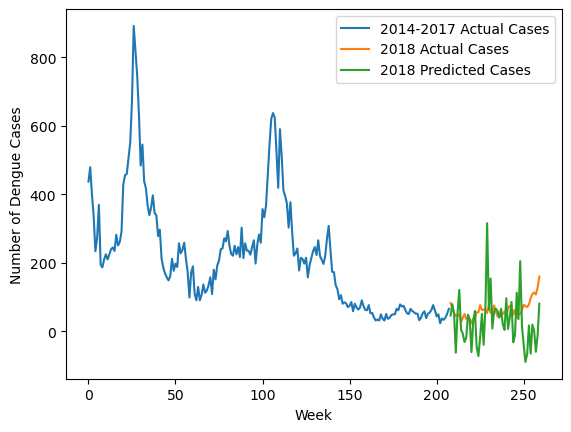

In [14]:
# Get the index of the test set
train_index = X_train.index
test_index = X_test.index

# Create a line plot of the predictions and true values against the index
plt.plot(train_index, y_train, label='2014-2017 Actual Cases')
plt.plot(test_index, y_test, label='2018 Actual Cases')
plt.plot(test_index, y_pred, label='2018 Predicted Cases')
plt.xlabel('Week')
plt.ylabel('Number of Dengue Cases')
plt.legend()
plt.show()

In [15]:
df = pd.DataFrame({'year': X_test['year'], 'week': X_test['week'],'y_true': y_test, 'y_pred': y_pred, })
df

,year,week,y_true,y_pred
208,2018,1,83,46.365595
209,2018,2,68,79.708459
210,2018,3,54,53.220436
211,2018,4,45,-61.820267
212,2018,5,48,53.355107
213,2018,6,50,121.367394
214,2018,7,28,5.780741
215,2018,8,39,-6.264093
216,2018,9,51,-30.623453
217,2018,10,37,-18.518401
